In [32]:
%run functions.ipynb
%run matrix_DFM_class.ipynb
%run PVD_class.ipynb
%run SPCP_class.ipynb

In [2]:
y,R,C,f,P,D,risk=generate_matrix_test_data(20,20,10000)

In [3]:
#generate an example problem: recover L_0 (and C_0) when given M_0
rho = .1   #proportion of corrupted entries
var = 20    #variance of the normal distribution generating the noise
def add_noise(L_0, rho, var):
    S_0 = np.random.binomial(1,rho, L_0.shape)  #affected entries
    N   = np.random.normal(0, var, L_0.shape)   #noise into affected entries
    C_0 = S_0 * N

    return(C_0 + L_0, C_0)

y, C_0 = add_noise(y, rho, var)

In [40]:
model=PVD(y-S.T)

In [41]:
model.fit()

In [42]:
trace_stat(np.hstack([P,R]).T,model.left_loading.T)

0.06859773692189214

In [43]:
trace_stat(np.hstack([C,D]).T,model.right_loading.T)

0.09452673029993067

In [44]:
model.left_loading.T.shape

(1, 20)

In [45]:
model.right_loading.T.shape

(1, 20)

In [4]:
import tensorly as tl
from tensorly.decomposition import tucker

Using numpy backend.


In [37]:
core, tucker_factors = tucker(y-S.T, ranks=[7,5,10000], init='random', tol=10e-5, random_state=0)

In [38]:
trace_stat(np.hstack([P,R]).T,tucker_factors[0].T)

0.3358723165284225

In [18]:
mat=ten2mat(y,2)
mat.shape

(10000, 400)

In [23]:
model=StablePCP()
model.fit(mat)
sparse=model.get_sparse()

Converged!


In [20]:
model.get_rank()

0

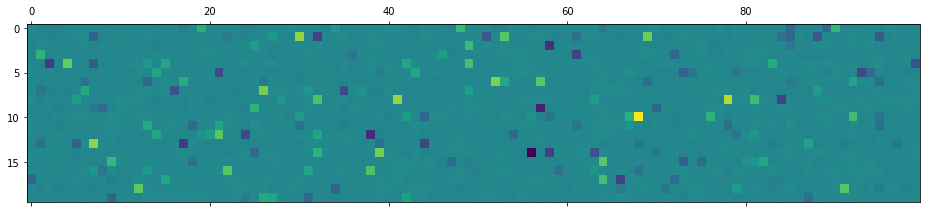

In [22]:
plt.matshow(y[0,:,:100])

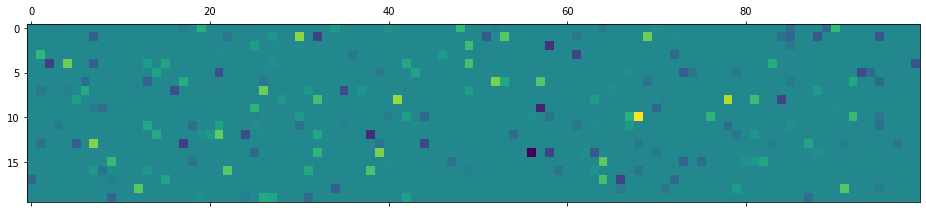

In [24]:
plt.matshow(C_0[0,:,:100])

In [26]:
S=sparse.reshape(10000,20,20)

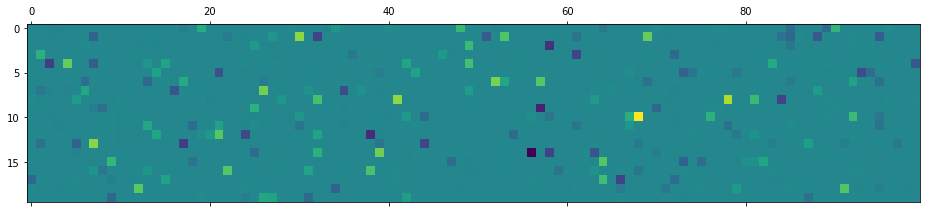

In [31]:
plt.matshow(S[:100,0,:].T)

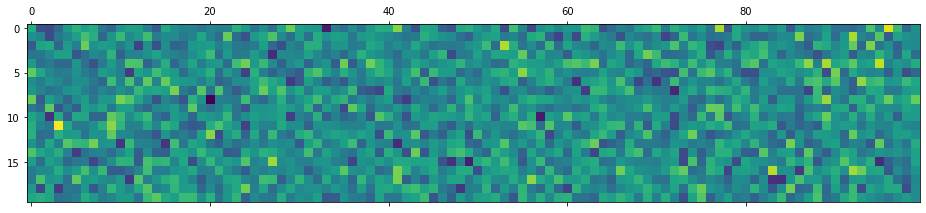

In [47]:
plt.matshow((y-C_0)[0,:,:100])

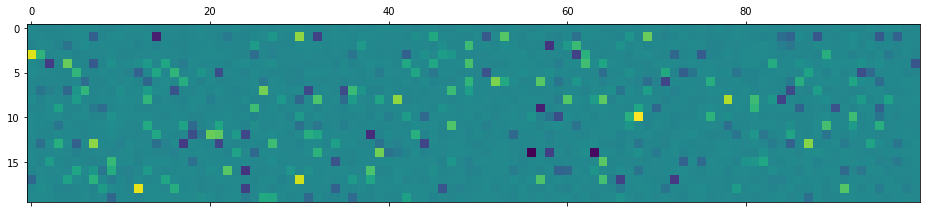

In [48]:
plt.matshow((y-S.T)[0,:,:100])

In [33]:
percentage_error(C_0,S.T)

1.3417848543414268


In [34]:
percentage_error(y-C_0,y-S.T)

8.27069520671714


In [35]:
percentage_error(y-C_0,y)

6.163950338205711
